# Analyse de données de films

Nous proposons de travailler sur des données décrivant des films. Les possibilités sont larges et vous êtes évalués sur vos propositions et votre méthodologie plus que sur vos résultats.

Les données de départ sont disponibles sur:
https://grouplens.org/datasets/movielens/
au format CSV. 

Nous nous intéresserons en particulier au jeu de données: **MovieLens 20M Dataset**. Dans ce jeu de données, vous disposez entre autre de:
* Idendifiant du film dans IMdb et TMdb (ça sera important ensuite)
* Catégorie(s) du film
* Titre du film
* Notes données par les internautes aux films

Afin de rendre le projet plus intéressant, nous ajoutons des données sur les acteurs et producteurs associés aux films (récupéré sur TMdb). Ces données sont disponibles sur les liens suivants:

http://webia.lip6.fr/~guigue/film_v2.pkl <br>
http://webia.lip6.fr/~guigue/act_v2.pkl <br>
http://webia.lip6.fr/~guigue/crew_v2.pkl

Ces fichiers contiennent respectivement : une nouvelle description des films (dont l'identifiant TMdb et la note moyenne donnée par les internautes, la date de sortie,...), une description des acteurs de chaque film et une description des équipes (scénariste, producteur, metteur en scène) pour chaque film.

Ces données sont des listes de taille 26908, chaque élément de la liste correspondant à un dictionnaire dont vous étudierez les clés pour récupérer les informations utiles.

**ATTENTION** Les contraintes de récupération d'informations en ligne font que la base MovieLens compte 27278 films mais les fichiers ci-dessus n'en comptent que 26908. Le plus simple est probablement d'éliminer les films de MovieLens qui ne sont pas dans cette seconde base.

## Consignes générales pour l'analyse des données

Vous devez proposer plusieurs analyses des données, qui devront à minima utiliser les
 techniques suivantes:
 
1. Mettre en forme les données pour identifier les acteurs et les catégories, les indexer
1. Traiter au moins un problème de régression supervisé (par exemple la prédiction de la note moyenne donnée à un film par les internautes).
1. Traiter au moins un problème de classification supervisé (par exemple la prédiction de la catégorie d'un film)
1. Utiliser les données catégorielles (catégories, acteurs,...) de manière discrète ET de manière coninue (*dummy coding*) dans des approches différentes
1. Proposer au moins une approche de catégorisation non supervisée (pour regrouper les acteurs par exemple)
1. Mener une campagne d'expérience permettant de comparer les performances sur un problème en fonction des valeurs d'un paramètre (et donc, in fine, trouver la meilleure valeur du paramètre)
1. Proposer quelques illustrations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
import sys
import math
sys.path.append('../')
import iads as iads
from iads import LabeledSet as ls
from iads import Classifiers as cl
from iads import util_iads as ui
from iads import utils as ut
from iads import engineering as en

## Chargement des données (base MovieLens + enrichissements)

In [2]:
# Chargement des données MovieLens
#movies = pd.read_csv("data/ml-20m/movies.csv", encoding='utf8')
movies = pd.read_csv("data/ml-20m/moviesFiltree.csv", encoding='utf8', index_col=0)
links = pd.read_csv("data/ml-20m/links.csv", encoding='utf8')
ratings = pd.read_csv("data/ml-20m/ratings.csv", encoding='utf8')
tags = pd.read_csv("data/ml-20m/tags.csv", encoding='utf8')
genomeS = pd.read_csv("data/ml-20m/genome-scores.csv", encoding='utf8')
genomeT = pd.read_csv("data/ml-20m/genome-tags.csv", encoding='utf8')

In [3]:
# Chargement des données complémentaires
acteurs = pkl.load(open("data/act_v2.pkl", "rb"))
equipes = pkl.load(open("data/crew_v2.pkl", "rb"))
films = pkl.load(open("data/film_v2.pkl", "rb"))

<h2>Filtrage des données</h2>

In [4]:
"""
print("BEFORE")
print(len(movies))
#print(len(films))
moviesFilter = []
filmId = []
cpt = 0
for i in range(len(films)):
    filmId.append(films[i]["id"])
    
for i in range(len(movies)):
    line = links.loc[links['movieId'] == movies.iloc[i]["movieId"]]
    value = float(line.iloc[0]["tmdbId"])
    if(math.isnan(value)):
        cpt += 1
        continue
    if(value in filmId):
        moviesFilter.append(movies.iloc[i]["movieId"])
    else:
        cpt += 1
movies = movies[movies.movieId.isin(moviesFilter)]
links = links[links.movieId.isin(moviesFilter)]
ratings = ratings[ratings.movieId.isin(moviesFilter)]
print("\nAFTER")
print(len(movies))
movies.to_csv("data/ml-20m/moviesFiltree.csv", encoding='utf8')
"""

'\nprint("BEFORE")\nprint(len(movies))\n#print(len(films))\nmoviesFilter = []\nfilmId = []\ncpt = 0\nfor i in range(len(films)):\n    filmId.append(films[i]["id"])\n    \nfor i in range(len(movies)):\n    line = links.loc[links[\'movieId\'] == movies.iloc[i]["movieId"]]\n    value = float(line.iloc[0]["tmdbId"])\n    if(math.isnan(value)):\n        cpt += 1\n        continue\n    if(value in filmId):\n        moviesFilter.append(movies.iloc[i]["movieId"])\n    else:\n        cpt += 1\nmovies = movies[movies.movieId.isin(moviesFilter)]\nlinks = links[links.movieId.isin(moviesFilter)]\nratings = ratings[ratings.movieId.isin(moviesFilter)]\nprint("\nAFTER")\nprint(len(movies))\nmovies.to_csv("data/ml-20m/moviesFiltree.csv", encoding=\'utf8\')\n'

<h2>Visionnage des données</h2>

In [5]:
#links
#ratings
#tags
#genomeS
#genomeT
#movies
#films[9]
#acteurs[0]
#equipes[0][194]

## Feature engineering
A vous de créer les caractéristiques de description des données qui permettront d'améliorer les performances dans les tâches que vous aurez choisi d'aborder dans le projet.

In [6]:
# Faire un dictionnaire avec tous les acteurs (acteur => indice)
# + un dictionnaire inversé (indice => acteur)
ue = en.UtilsEngineering(films, acteurs)
print("Tom Hanks à joué dans", ue.actorsPlayedMovies["Tom Hanks"]["Total"], "films")
print("Tom Hanks à joué dans", ue.actorsPlayedMovies["Tom Hanks"]["Comedy"], "comédies")

UtilsEngineering init in process
UtilsEngineering init successful
Tom Hanks à joué dans 57 films
Tom Hanks à joué dans 33 comédies


## Genres predictions
Faire un dataframe sur les categories, leur quantites de films et leur engagements puis le tester sur des classifiers afin de prédire la note moyenne des films de la categorie

In [7]:
#ge = en.GenresEngineering(movies,(links, films))
#df = ge.toDataFrame()
#df.to_csv("data/engineering/genres.csv", encoding='utf8')
df = pd.read_csv("data/engineering/genres.csv", encoding='utf8', index_col=0)
df

,quantite,engagement,target
Adventure,0.160587,0.653805,-1
Animation,0.061394,0.234012,1
Children,0.072183,0.259724,-1
Comedy,0.625427,0.784191,-1
Fantasy,0.091354,0.347602,-1
Romance,0.299752,0.376248,-1
Drama,1.000000,1.000000,1
Action,0.253648,0.841496,-1
Crime,0.209329,0.394125,1
Thriller,0.305107,0.692253,-1


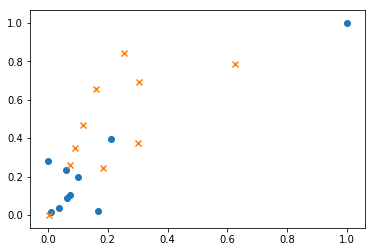

In [8]:
une_base = ls.LabeledSet(2)
for i in range(len(df)):
    une_base.addExample([df.iloc[i]['quantite'], df.iloc[i]['engagement']], df.iloc[i]['target'])
ut.plot2DSet(une_base)

No handles with labels found to put in legend.


Mean accuracy 61.83333333333334
Variance accuracy 182.19444444444446


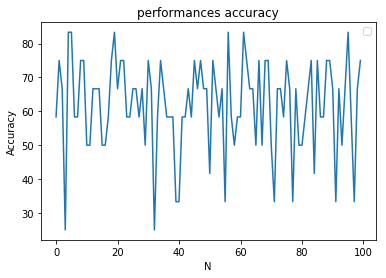

(61.83333333333334, 182.19444444444446)

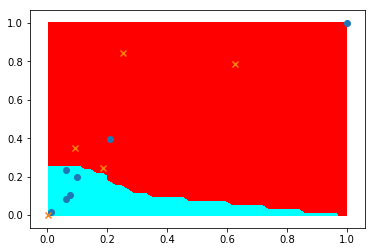

In [9]:
#ut.affiche_base(une_base)
knn = cl.ClassifierKNN(une_base.getInputDimension(), 3)
ut.super_entrainement(100, une_base, knn, 40)

## Movies prediction
Faire un dataFrame sur les films, le nombre de votes qu'ils on recuent, leur langue original, la note moyenne des films dans lesquels les acteurs principaux ont joués et leur popularité afin de prédire leur note

In [10]:
me = en.MoviesEngineering(films, (ue.plays, ue.actorsMeanMovies, ue.languages))
df = me.toDataFrame('median',"vote_count")
df

MoviesEngineering init in process
MoviesEngineering init successful
stack original_language
median 26.0


,mean_main_actors,popularity,note,original_language,target
Toy Story,0.653343,0.428418,0.79,en,1
Jumanji,0.652299,0.055441,0.71,en,1
Grumpier Old Men,0.633164,0.114305,0.65,en,1
Waiting to Exhale,0.604392,0.054876,0.61,en,1
Father of the Bride Part II,0.605705,0.128245,0.61,en,1
Heat,0.333967,0.257092,0.78,en,1
Sabrina,0.688355,0.116205,0.61,en,1
Tom and Huck,0.582065,0.067104,0.53,en,1
Sudden Death,0.598221,0.110806,0.57,en,1
GoldenEye,0.620224,0.312834,0.68,en,1


## Classifiers multi classes 
Faire 19 dataframes chacun correspondant à un dataframe 1 contre tous par rapport à la catégorie. Prenons par exemple la catégorie comédie, tous les films appartenant à la catégorie auront une classe +1 tandis que les autres auront une classe -1, de même pour toutes les autres catégories.

<p> Exemple sur le genre 16 correspondant au genre aventure

In [70]:
me = en.MoviesGenresEngineering(films, (ue.plays, ue.actorsMeanMovies, ue.languages))
df = me.toDataFrame("vs", "genre_id", 16)
df

MoviesEngineering init in process
MoviesEngineering init successful
vs 16


,vote_count,mean_main_actors,original_language,popularity,note,target
Toy Story,0.453466,0.653343,0.000000,0.428418,0.79,1
Toy Story,0.453466,0.653343,0.000000,0.428418,0.79,-1
Toy Story,0.453466,0.653343,0.000000,0.428418,0.79,-1
Jumanji,0.265622,0.652299,0.000000,0.055441,0.71,-1
Jumanji,0.265622,0.652299,0.000000,0.055441,0.71,-1
Jumanji,0.265622,0.652299,0.000000,0.055441,0.71,-1
Grumpier Old Men,0.006648,0.633164,0.000000,0.114305,0.65,-1
Grumpier Old Men,0.006648,0.633164,0.000000,0.114305,0.65,-1
Waiting to Exhale,0.002612,0.604392,0.000000,0.054876,0.61,-1
Waiting to Exhale,0.002612,0.604392,0.000000,0.054876,0.61,-1


<p> Prenons pour commencer les 3 premiers genres :
    <ul>
    <li>  Action (28) </li>
    <li> Adventure  (12) </li>
    <li> Animation (16) </li>
    </ul>

In [232]:
dfs = []
ke_genres = list(ue.genres.keys())
for k in range(3) :
    dfs.append(me.toDataFrame("vs", "genre_id", ke_genres[k]))
    #for i in range(len(dfs[k])):
     #   #On récupère les indices des membres qui ont le meme nom :
      #  lId = []
       # ltarget = []
        #lId.append(i)
        #ltarget.append(dfs[k].iloc[i]['target'])
        #for j in range(i+1, len(dfs[k])):
            #if dfs[k].index.values[i] == dfs[k].index.values[j]:
       #         lId.append(j)
         #       ltarget.append(dfs[k].iloc[j]['target'])
      #  print(ltarget)
      #  print(lId)
      #  print(lId[1:])
      #  if(1 in ltarget):
      #      for t in range(len(ltarget)) :
      #          if ltarget[t] == -1 :
      #              dfs[k].drop(lId[1:])
      #  else :
      #      dfs[k].drop(lId[d])
        
            

vs 28
vs 12
vs 16


In [233]:
"""d = (me.toDataFrame("vs", "genre_id", 16))
# Delete row at index position 0 & 1
modDfObj = d#.drop([d.index[1]])
modDfObj


3
# delete all rows with column 'Age' has value 30 to 40 
indexNames = d[ (d['target'] == -1) & (d.index.values[1] == "Toy Story") ].index
d.drop(indexNames , inplace=False)
print(d.index.values[4] == "Toy Story")"""

'd = (me.toDataFrame("vs", "genre_id", 16))\n# Delete row at index position 0 & 1\nmodDfObj = d#.drop([d.index[1]])\nmodDfObj\n\n\n3\n# delete all rows with column \'Age\' has value 30 to 40 \nindexNames = d[ (d[\'target\'] == -1) & (d.index.values[1] == "Toy Story") ].index\nd.drop(indexNames , inplace=False)\nprint(d.index.values[4] == "Toy Story")'

<p> Créons maintenant les bases associées

<p> Trouvons en premier lieu les meilleures paramètres en 2D.

In [234]:
print(ue.genres[12], ue.genres[28], ue.genres[16])



Adventure Action Animation


In [238]:
bases = []
caracteristics = ['original_language', 'mean_main_actors', 'popularity', 'note']
for d in dfs :
    print("dataframe")
    li = []
    for c1 in range(len(caracteristics)):
        ca1 = caracteristics[c1]

        print("init for", ca1)
        for c2 in range(c1+1, len(caracteristics)):
            ca2 = caracteristics[c2]
            
            taille = len(d)
            indice = np.arange(taille)
            indice = np.random.permutation(taille)
            indice = indice[:1000]
            une_base = ls.LabeledSet(2)
            for i in indice:
                une_base.addExample([d.iloc[i][ca1], d.iloc[i][c2]]
                        , d.iloc[i]['target'])
            li.append(une_base)
        print("done for", ca1, "\n")
    bases.append(li)
        

dataframe
init for original_language
done for original_language 

init for mean_main_actors
done for mean_main_actors 

init for popularity
done for popularity 

init for note
done for note 

dataframe
init for original_language
done for original_language 

init for mean_main_actors
done for mean_main_actors 

init for popularity
done for popularity 

init for note
done for note 

dataframe
init for original_language
done for original_language 

init for mean_main_actors
done for mean_main_actors 

init for popularity
done for popularity 

init for note
done for note 



In [236]:
print(len(bases))

3


<p> Faisons les s'entrainer



 init


No handles with labels found to put in legend.


Mean accuracy 84.98571428571428
Variance accuracy 437.74033163265307


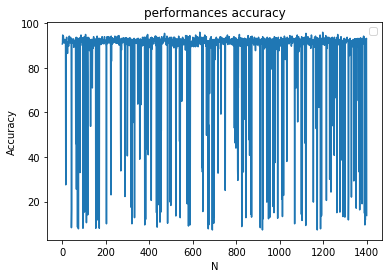

No handles with labels found to put in legend.


Mean accuracy 91.36964285714286
Variance accuracy 321.25702487244894


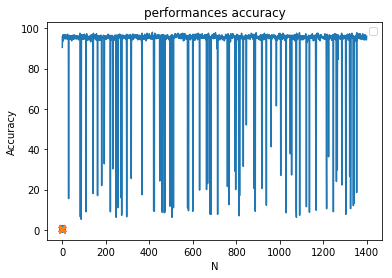

No handles with labels found to put in legend.


Mean accuracy 96.65267857142857
Variance accuracy 96.00253746811225


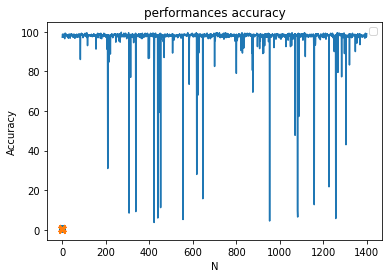



 done
Chosen criteria : ['original_language', 'mean_main_actors']


 init


No handles with labels found to put in legend.


Mean accuracy 86.18071428571429
Variance accuracy 448.2690387755103


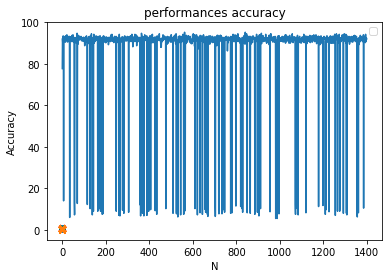

No handles with labels found to put in legend.


Mean accuracy 91.78946428571429
Variance accuracy 334.08063007015306


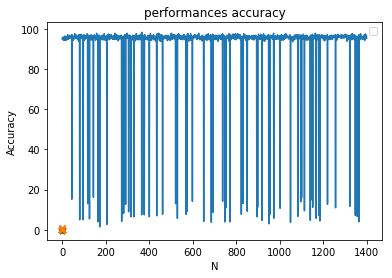

No handles with labels found to put in legend.


Mean accuracy 96.57375
Variance accuracy 139.67183772321434


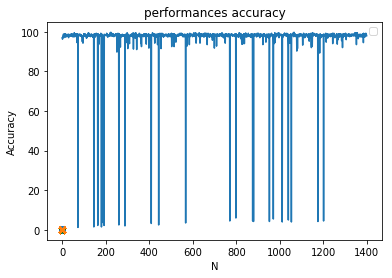



 done
Chosen criteria : ['original_language', 'mean_main_actors']


 init


No handles with labels found to put in legend.


Mean accuracy 85.75125
Variance accuracy 460.3467395089286


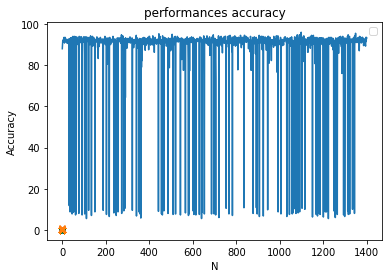

No handles with labels found to put in legend.


Mean accuracy 90.31678571428571
Variance accuracy 344.3547360969387


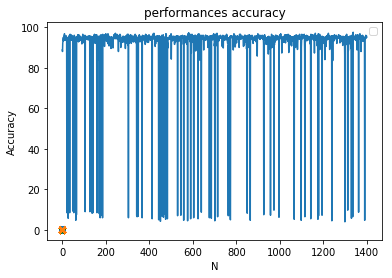

No handles with labels found to put in legend.


Mean accuracy 95.33910714285715
Variance accuracy 134.07915813137757


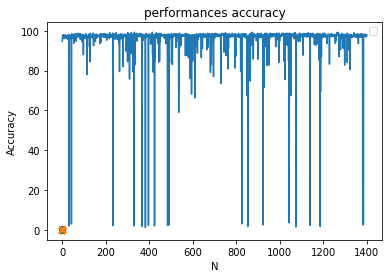



 done
Chosen criteria : ['original_language', 'note']


 init


No handles with labels found to put in legend.


Mean accuracy 86.24660714285714
Variance accuracy 408.06869384566323


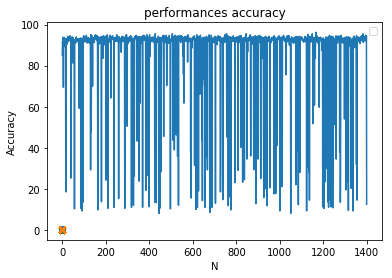

No handles with labels found to put in legend.


Mean accuracy 92.79732142857142
Variance accuracy 281.12057318239795


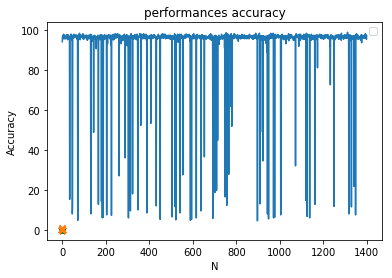

No handles with labels found to put in legend.


Mean accuracy 96.72892857142857
Variance accuracy 131.5280381377551


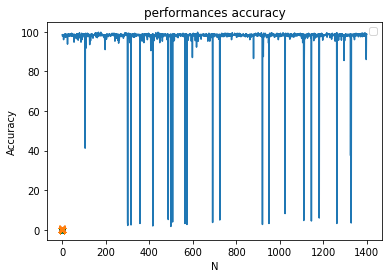



 done
Chosen criteria : ['original_language', 'note']


 init


No handles with labels found to put in legend.


Mean accuracy 86.62821428571428
Variance accuracy 295.62498966836733


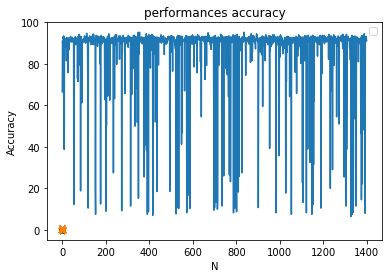

No handles with labels found to put in legend.


Mean accuracy 90.63410714285715
Variance accuracy 273.88964920280614


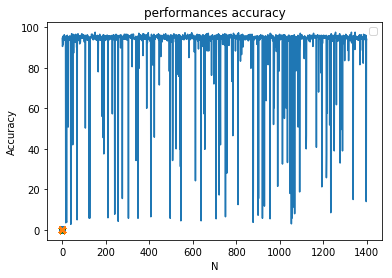

No handles with labels found to put in legend.


Mean accuracy 97.43535714285714
Variance accuracy 96.62207130102041


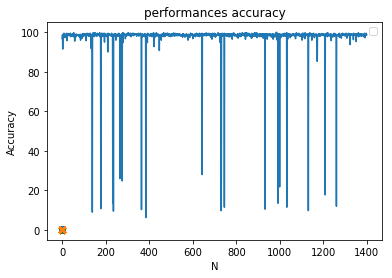



 done
Chosen criteria : ['original_language', 'note']


 init


No handles with labels found to put in legend.


Mean accuracy 85.49553571428571
Variance accuracy 468.8627032844388


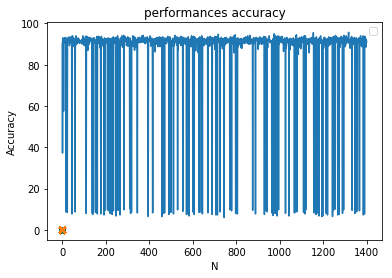

No handles with labels found to put in legend.


Mean accuracy 93.21625
Variance accuracy 241.83078058035713


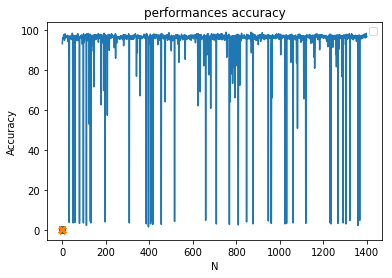

No handles with labels found to put in legend.


Mean accuracy 96.24714285714286
Variance accuracy 145.98543826530613


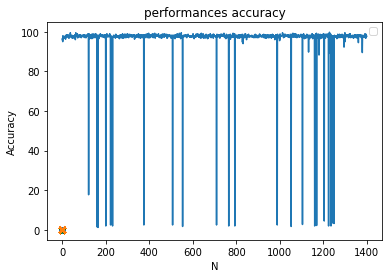



 done
Chosen criteria : ['original_language', 'note']


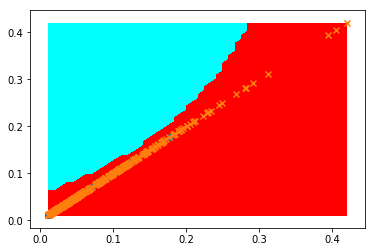

In [245]:
combinaisons = []
for c1 in range(len(caracteristics)):
    for c2 in range(c1+1, len(caracteristics)):
        c = [caracteristics[c1], caracteristics[c2]]
        combinaisons.append(c)
        
        
clas = []
for i in range(len(bases[0])):
    print("\n\n init")
    k= cl.KernelPoly()
    cla1= cl.ClassifierPerceptronKernel(6,0.05,k)
    mean1, vari1 = ut.super_entrainement(1400, bases[0][i],cla1, 60)
    k= cl.KernelPoly()
    cla2= cl.ClassifierPerceptronKernel(6,0.05,k)
    mean2, vari2 = ut.super_entrainement(1400, bases[1][i],cla2, 60)    
    clas.append(cla)
    k= cl.KernelPoly()
    cla3= cl.ClassifierPerceptronKernel(6,0.05,k)
    mean3, vari3 = ut.super_entrainement(1400, bases[2][i],cla3, 60)
    if i == 0 : 
        mini_mean = mean1 + mean2 + mean3
        minicombi = 0
    else :
        if mean1 + mean2 + mean3 < mini_mean :
            mini_mean = mean1 + mean2 + mean3
            minicombi = i
            minicla1 = cla1
            minicla2 = cla2
            minicla3 = cla3
        
    print("\n\n done")
    print("Chosen criteria :", combinaisons[minicombi] )

<p> Cette fois-ci, les paramètres retenus sont :
    <ul>
        <li> Original_language </li>
        <li> Note </li>
    </ul>

<p> Fonction predScores qui permet de prédire la catégorie d'un film.

In [262]:
def predScore(cla, x):
    k = cl.KernelPoly()
    y = k.transform(x)
    if(np.dot(cla.w, y) > 0):
        return 1
    return -1

def predScores(df, listClassifiers ,movieId, criterion1, criterion2):
    coord = [df[0].iloc[movieId][criterion1],df[0].iloc[movieId][criterion2]]
    best = 0
    bestId = 0
    for i in range(3):
        p = predScore(listClassifiers[i], coord)
        if p > best :
            best = p
            bestId = 1
    return bestId, best, movieId

n=0
best =-1
while(best<= 0 and n < len(dfs[0])):
    print("ok")
    (number, best, movieId) = predScores(dfs, [cla1, cla2, cla3], 9, 'note', 'original_language')
    if best > 0:
        print(movieId, best)
        print("Le genre trouvé est ", ue.genres[ke_genres[number]],"(", ke_genres[number],")")
        g = films[movieId]['genre_ids']
        print("Les genres du films sont")
        for ge in g :
            print(ue.genres[ge])
    n+=1
    
    

ok
9 1
Le genre trouvé est  Adventure ( 12 )
Les genres du films sont
Adventure
Action
Thriller


In [263]:
print(n)

1
